In [12]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import collections

#  Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals:
Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
Present the financial benefit of this project to the marketing team

# bank client data:
## 1 - age (numeric)
## 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
## 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
## 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
## 5 - default: has credit in default? (categorical: 'no','yes','unknown')
## 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
## 7 - loan: has personal loan? (categorical: 'no','yes','unknown') 
# Related with the last contact of the current campaign:
## 8 - contact: contact communication type (categorical: 'cellular','telephone') 
## 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
## 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
## 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# Other attributes:
## 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
## 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
## 14 - previous: number of contacts performed before this campaign and for this client (numeric)
## 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# Social and economic context attributes
## 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
## 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
## 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
## 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
## 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
## 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
df1 = pd.read_csv("/home/pratyush/Documents/UpGrad/bank-additional/bank-additional/bank-additional-full.csv",sep=";")

In [8]:
#no null elements..
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
#dataset summary of numeric variables..
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
for i in df1.columns:
    counter=collections.Counter(df1[i])
    print((i,counter))
    print("\n")
    
# we can use age, nr.employed and emp.var.rate as categorical as it got a less number of unique values.. 
# for now we will use it as numeric

# age, duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed as numeric..

('age', Counter({31: 1947, 32: 1846, 33: 1833, 36: 1780, 35: 1759, 34: 1745, 30: 1714, 37: 1475, 29: 1453, 39: 1432, 38: 1407, 41: 1278, 40: 1161, 42: 1142, 45: 1103, 43: 1055, 46: 1030, 44: 1011, 28: 1001, 48: 979, 47: 928, 50: 875, 27: 851, 49: 839, 52: 779, 51: 754, 53: 733, 56: 704, 26: 698, 54: 684, 55: 648, 57: 646, 25: 598, 58: 576, 59: 463, 24: 463, 60: 283, 23: 226, 22: 137, 21: 102, 61: 73, 20: 65, 62: 62, 66: 57, 64: 57, 63: 55, 71: 53, 70: 47, 65: 44, 19: 42, 76: 34, 73: 34, 72: 34, 69: 34, 68: 33, 74: 32, 80: 31, 18: 28, 78: 27, 67: 26, 75: 24, 88: 22, 77: 20, 81: 20, 82: 17, 83: 17, 85: 15, 79: 14, 86: 8, 84: 7, 17: 5, 92: 4, 91: 2, 98: 2, 89: 2, 95: 1, 87: 1, 94: 1}))


('job', Counter({'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'services': 3969, 'management': 2924, 'retired': 1720, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875, 'unknown': 330}))


('marital', Counter({'married': 24928, 'single': 11568, 

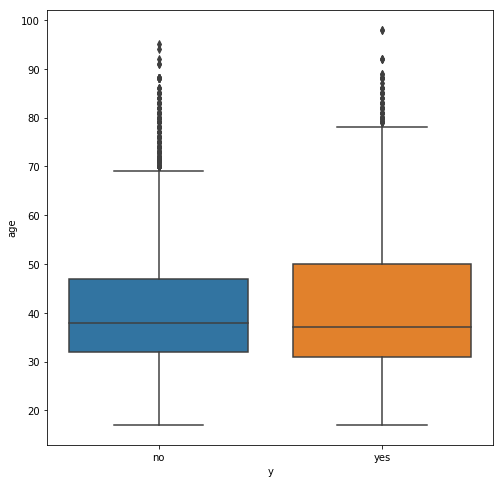

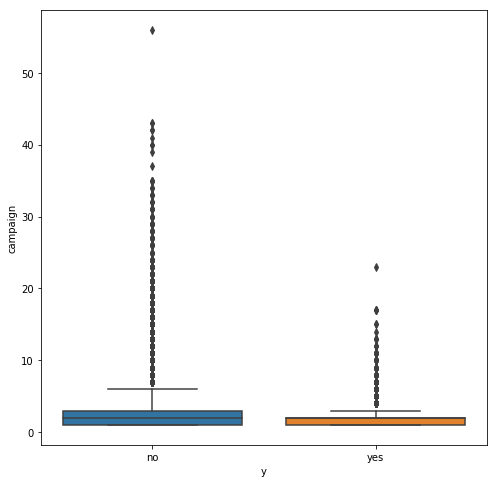

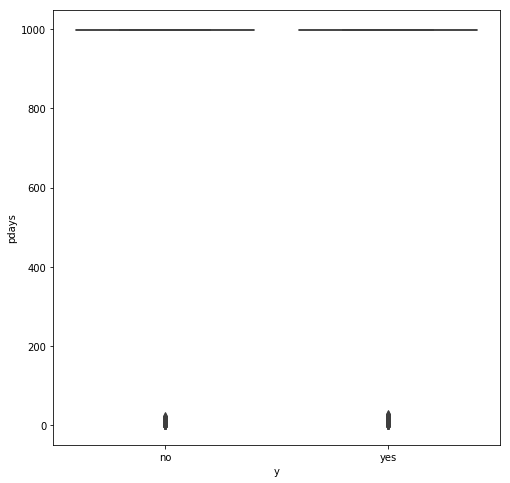

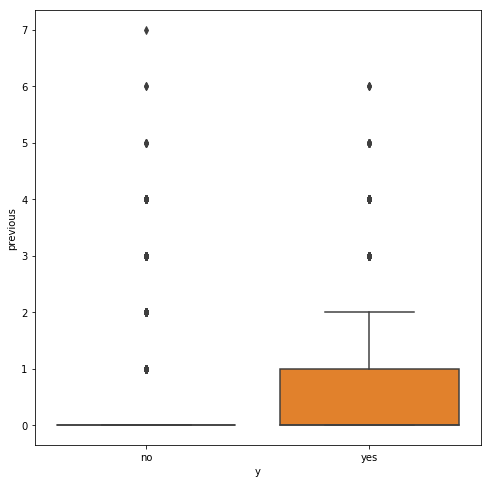

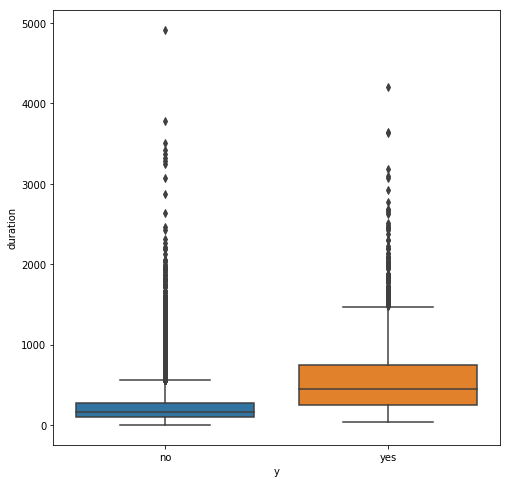

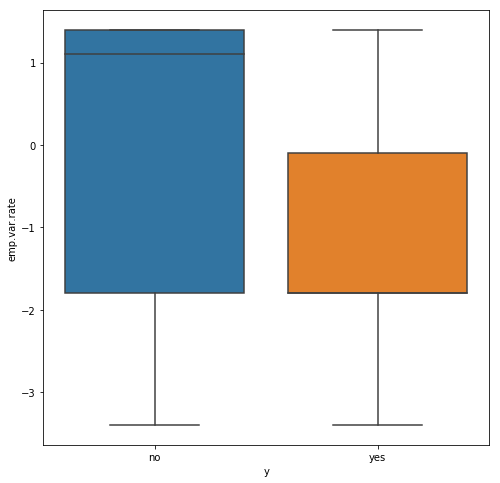

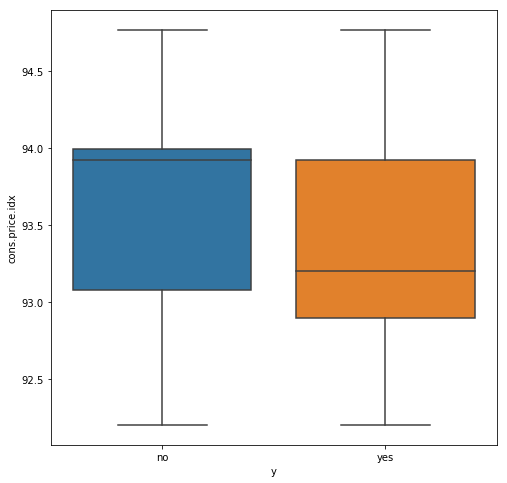

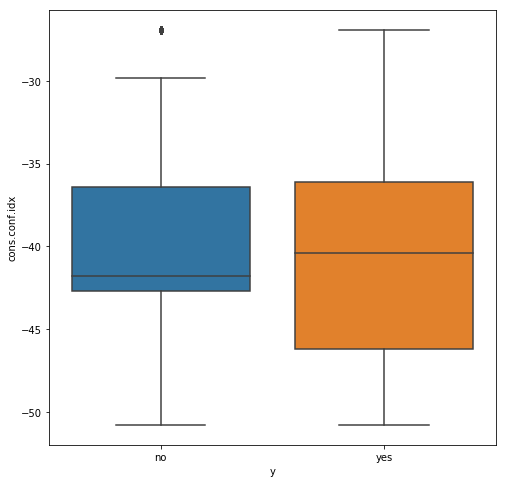

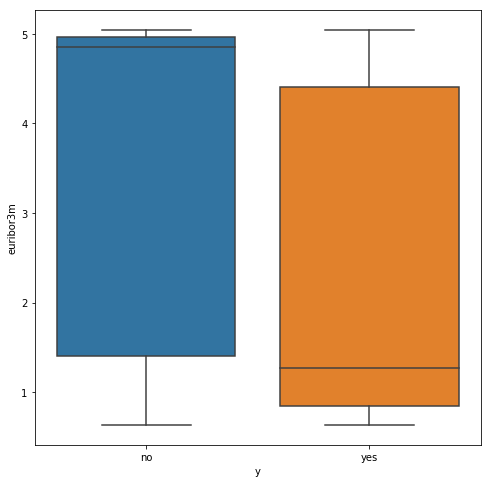

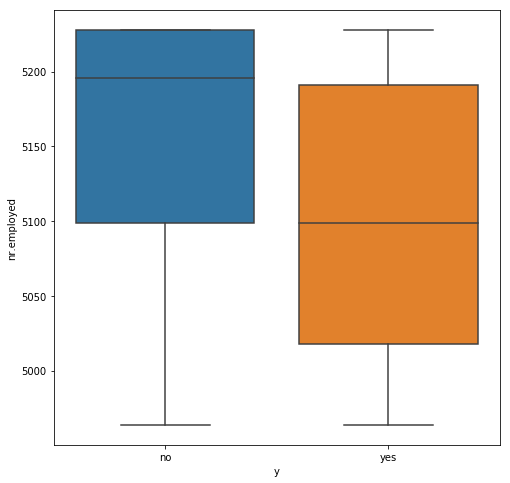

In [69]:
numeric_vars=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_vars=[i for i in df1.columns if i not in numeric_vars]
categorical_vars.remove("y")
target="y"

for i in numeric_vars:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=df1)
    plt.show()
# age doesnt seem as a separator for its distribution is quite same for both results..

# previous attribute has a great amout of information related to the classification

age


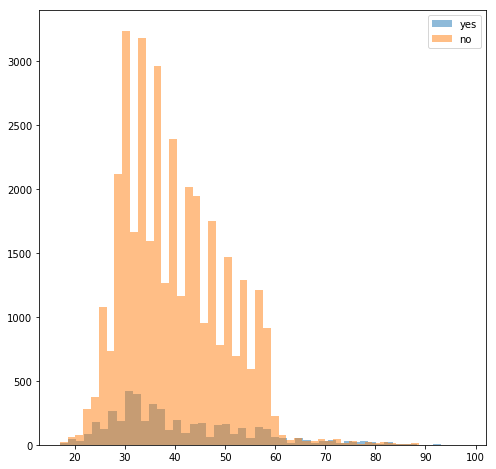

campaign


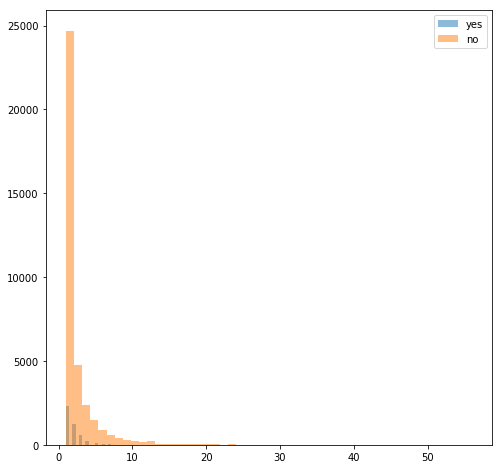

pdays


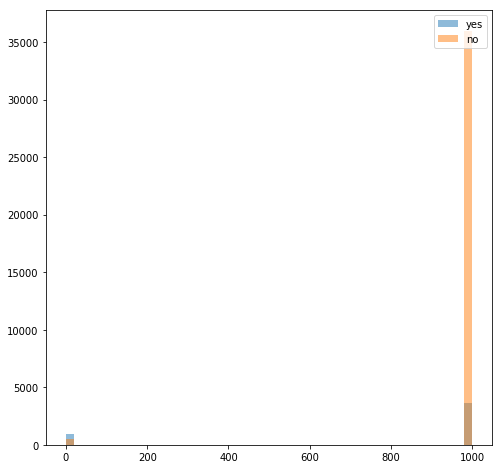

previous


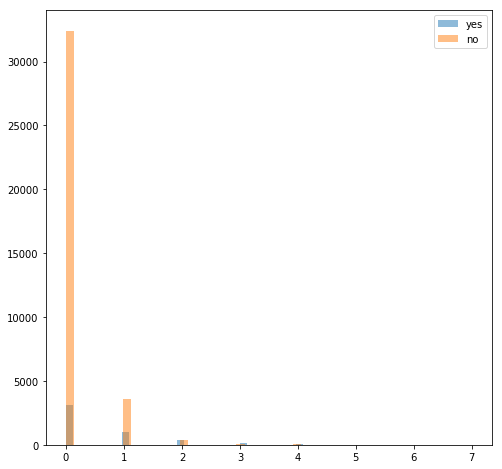

duration


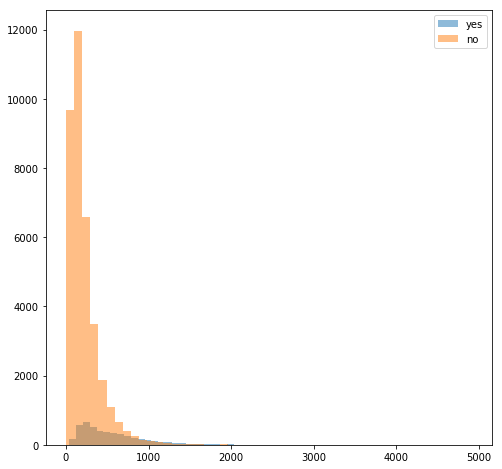

emp.var.rate


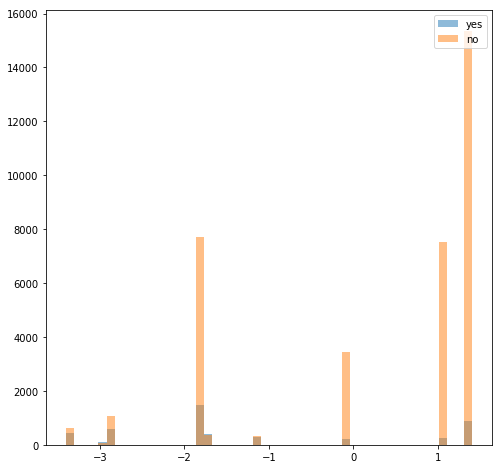

cons.price.idx


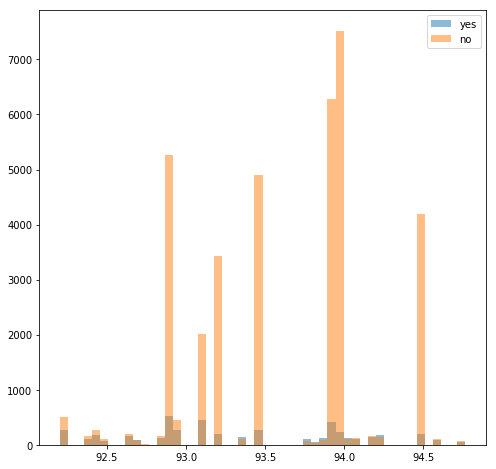

cons.conf.idx


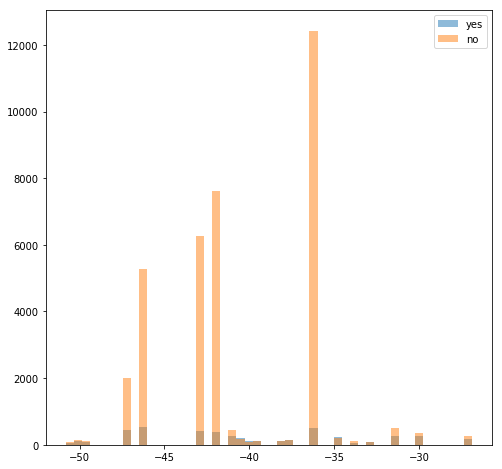

euribor3m


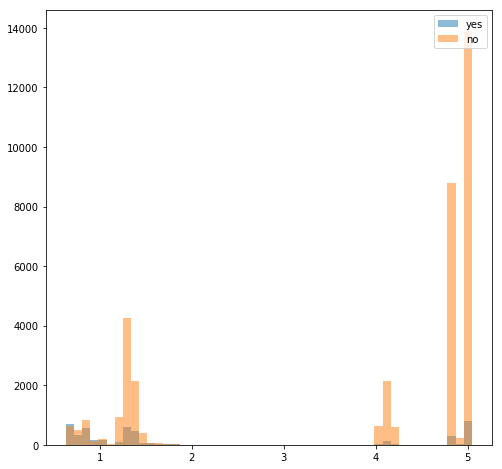

nr.employed


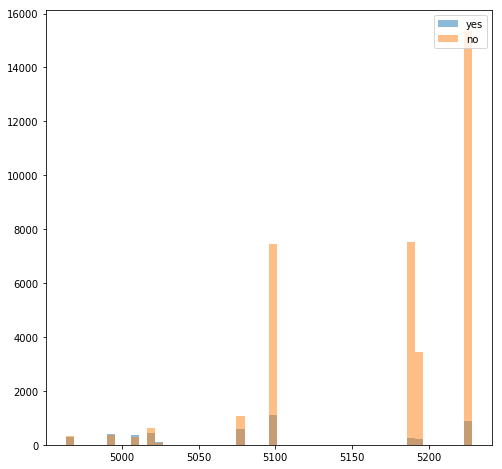

In [71]:
bins=50
for i in numeric_vars:
    plt.figure(figsize=(8,8))
    pyplot.hist(df1[df1["y"]=="yes"][i].values, bins, alpha=0.5, label='yes', )
    pyplot.hist(df1[df1["y"]=="no"][i].values, bins, alpha=0.5, label='no')
    pyplot.legend(loc='upper right')
    print(i)
    pyplot.show()

# 1. The categorical histogram plots show that the the distribution are similar or different here we see that age and emp.varrate have same categorical plots..
# 2. The categorical histograms show distribution..

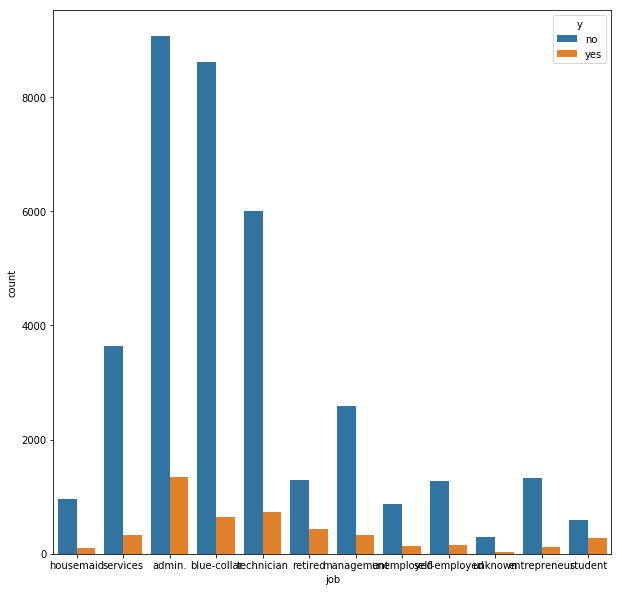

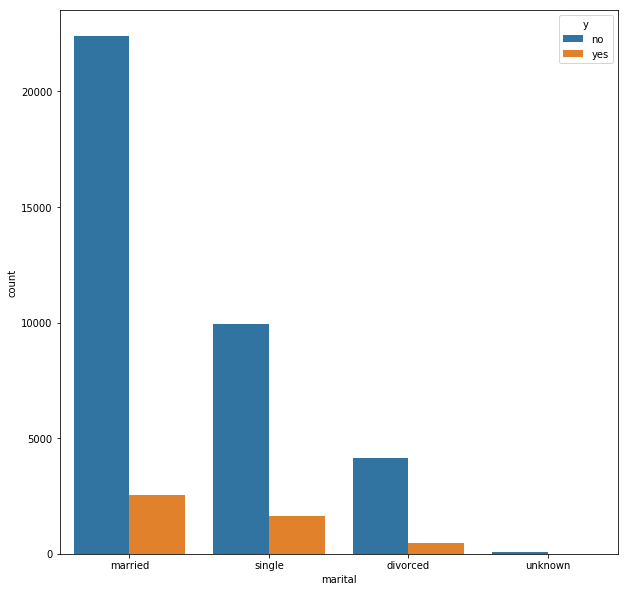

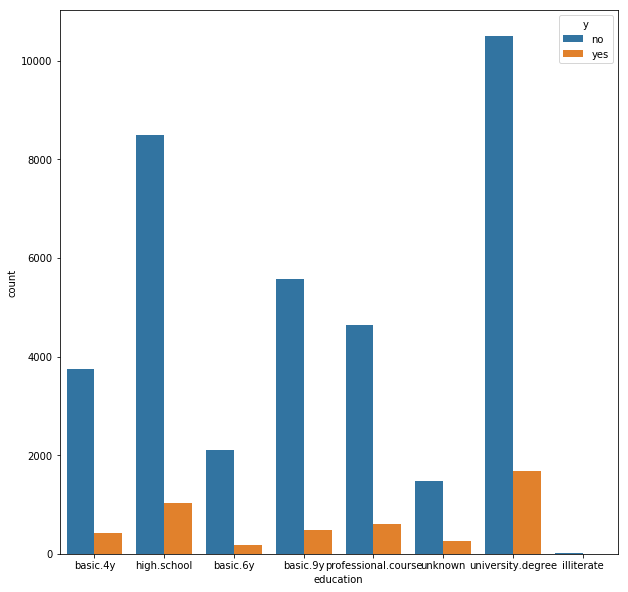

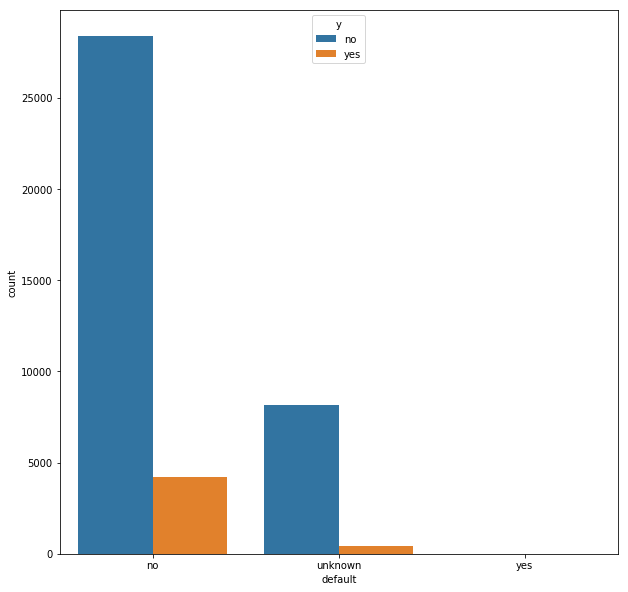

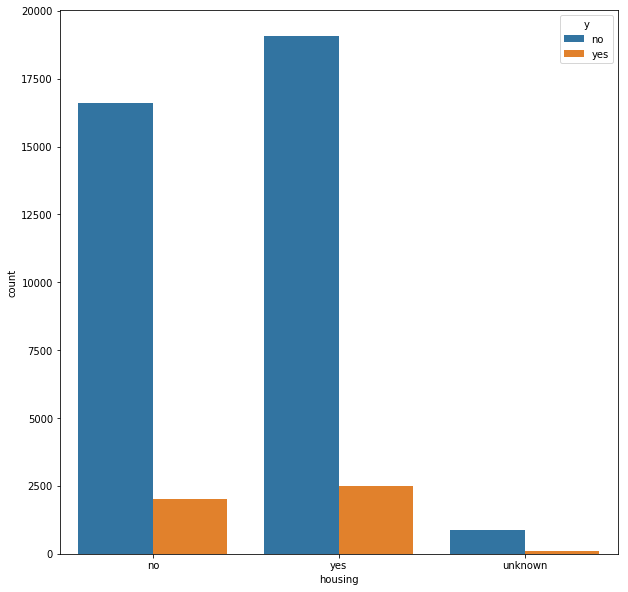

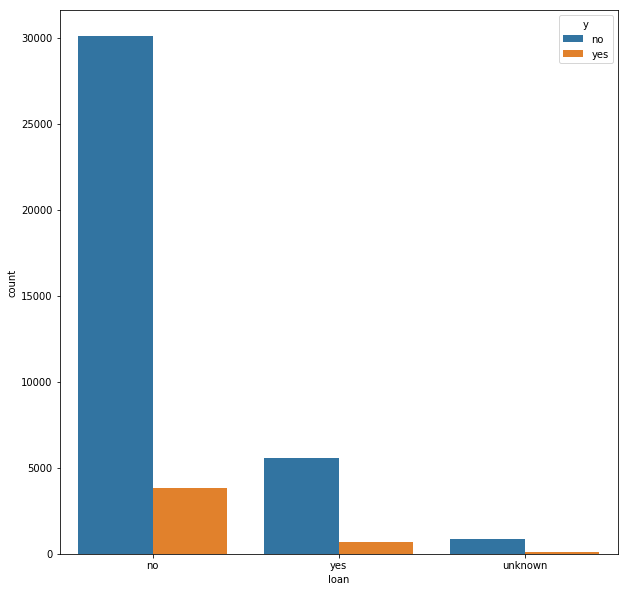

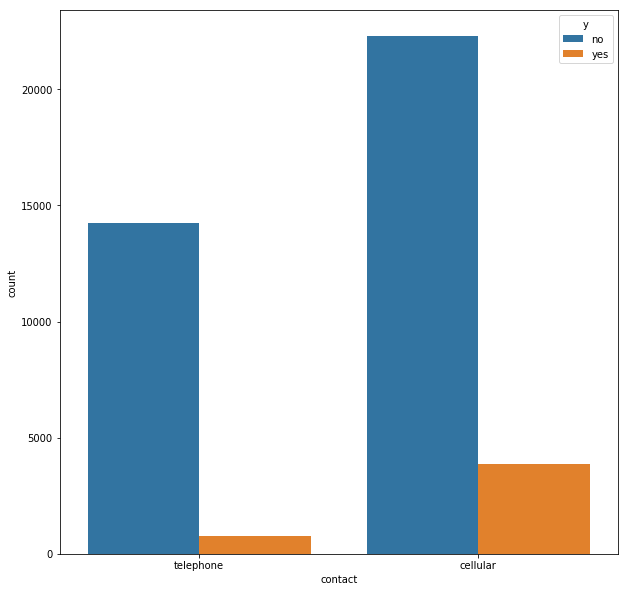

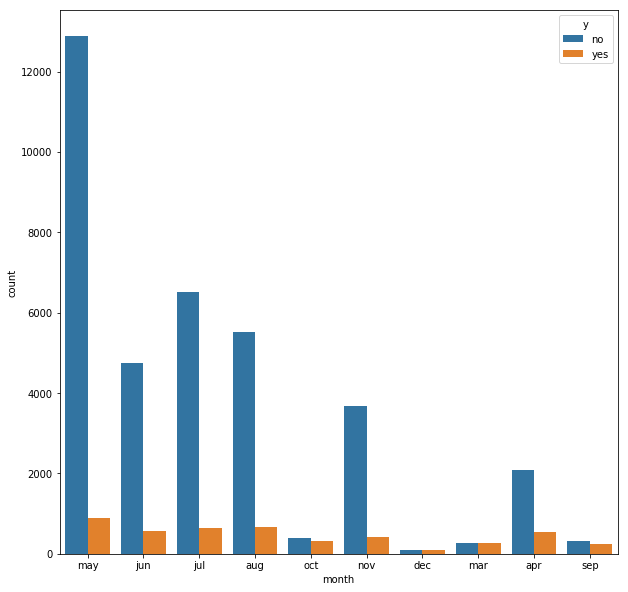

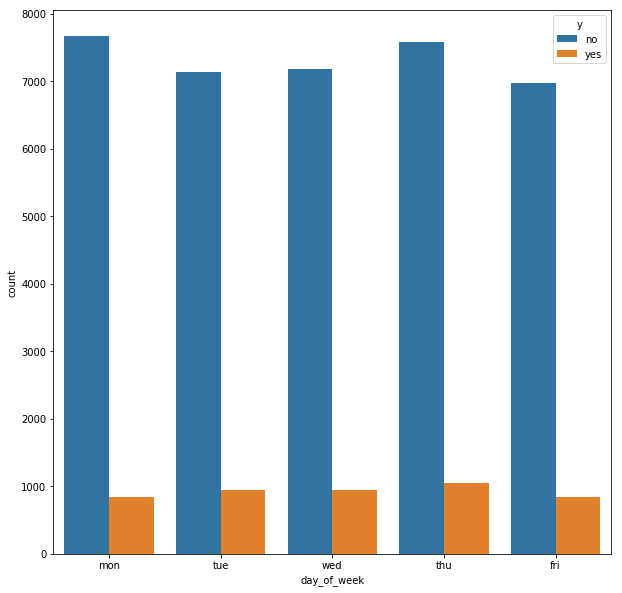

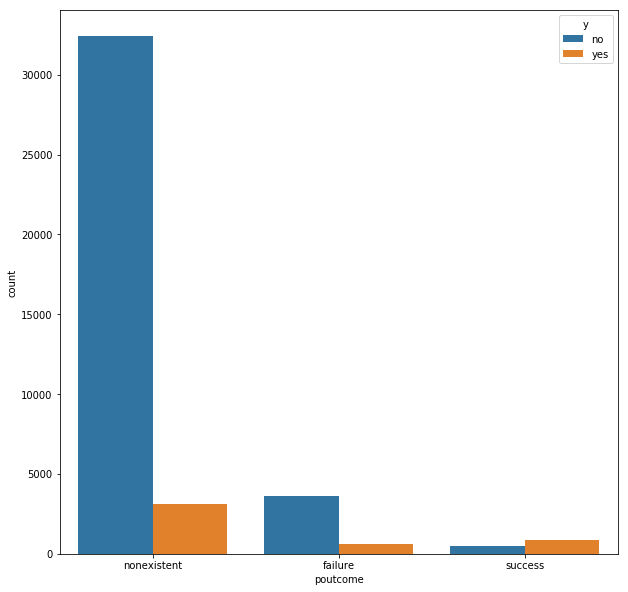

In [70]:
for i in categorical_vars:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, hue=target, data=df1)
    pyplot.show()

# here the categorical variables
## 1. no significant classification importance shown.. except month attribute ...
## 2. The pdays attribute can be removed as it has all the variables with nearly same attribute value..

# Next step one hot encoding for categorical variables..

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
enc = OneHotEncoder()
enc.fit(df1[categorical_vars])
tr=enc.transform(df1[categorical_vars]).toarray()

enc_col=[str(i) for i in range(tr.shape[1])]
for no,i in enumerate(enc_col):
    df1[i]=tr[:,no]

In [87]:
df1=df1.drop(categorical_vars,axis=1)

In [90]:
df1=df1.drop("pdays",axis=1)

In [99]:
numeric_vars.remove("pdays")

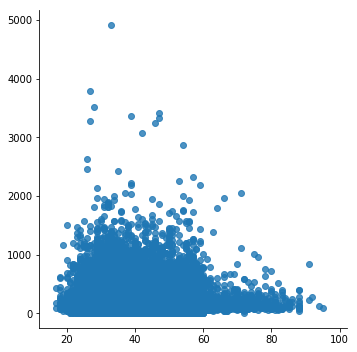

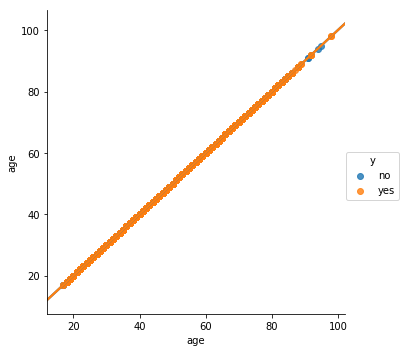

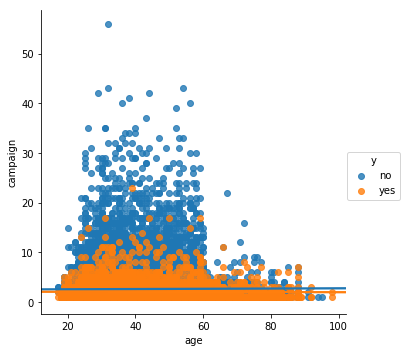

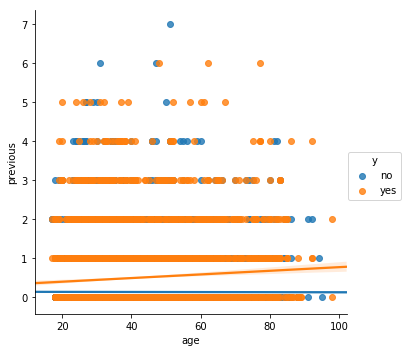

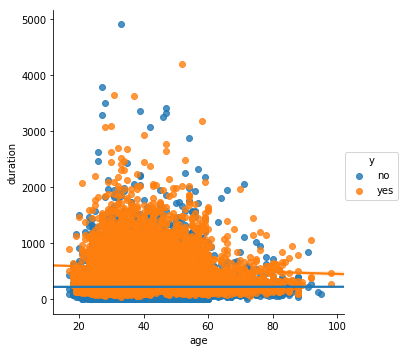

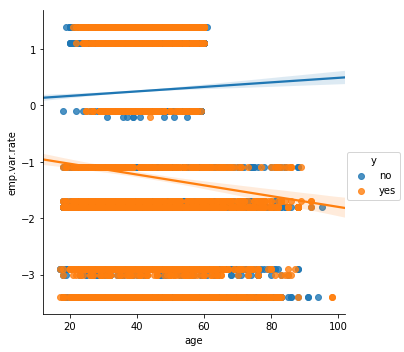

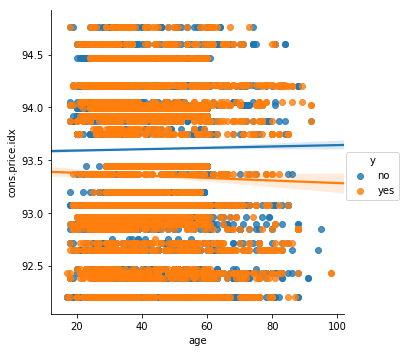

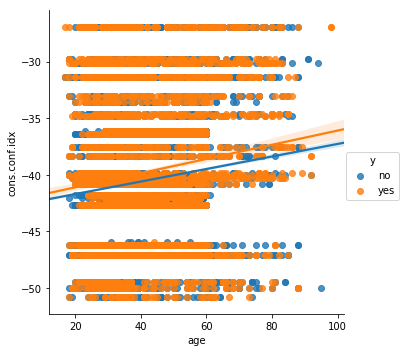

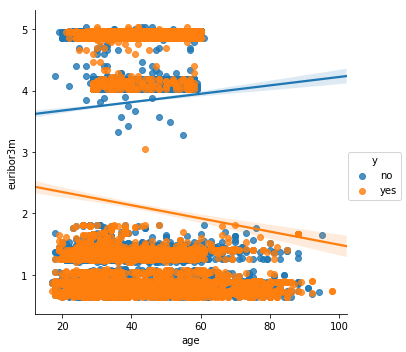

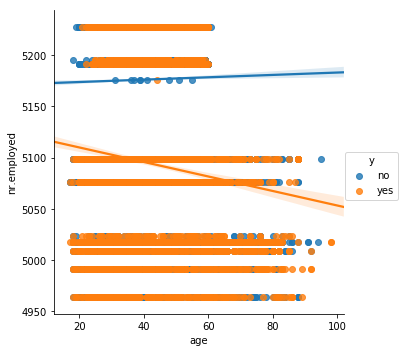

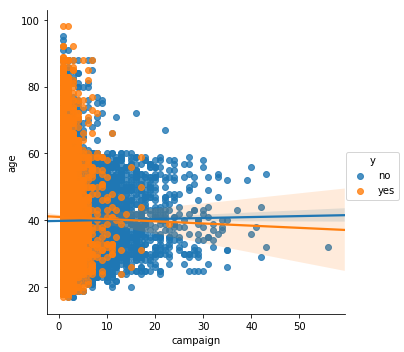

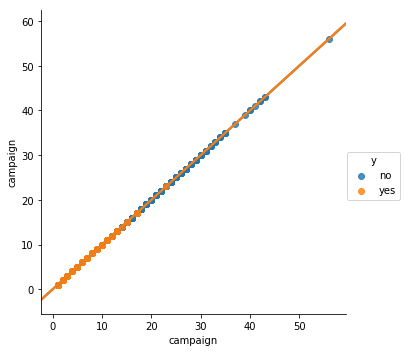

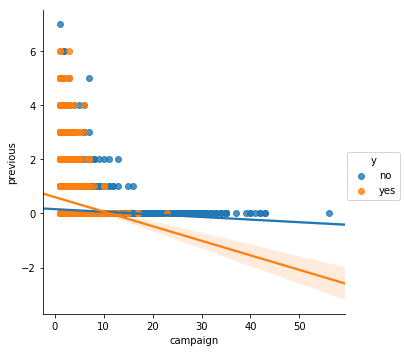

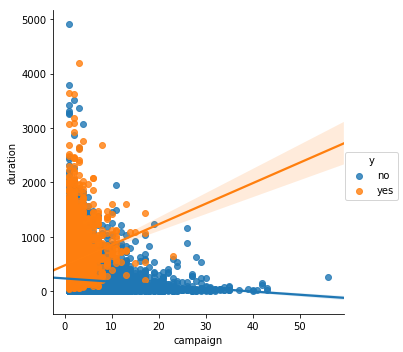

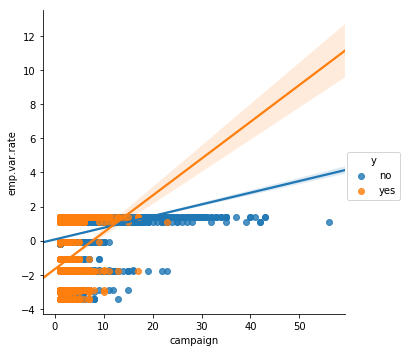

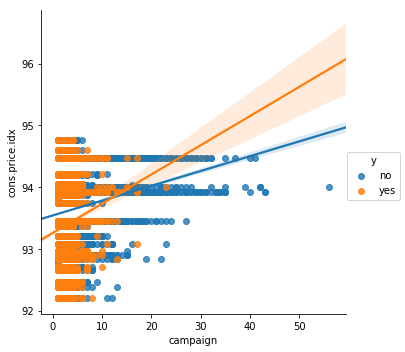

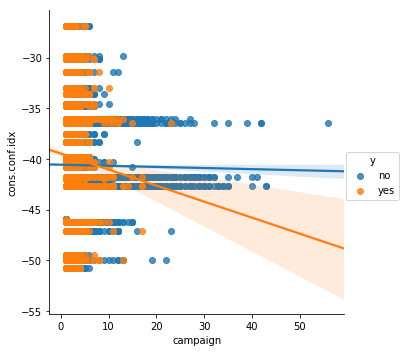

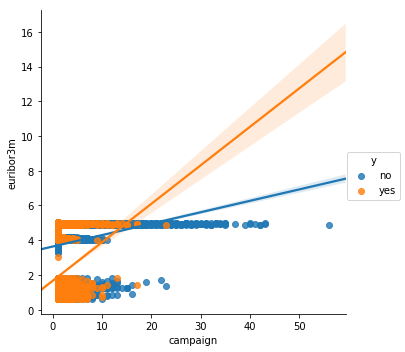

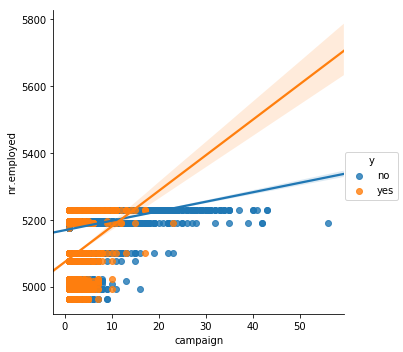

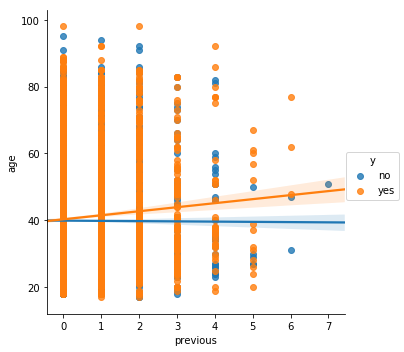

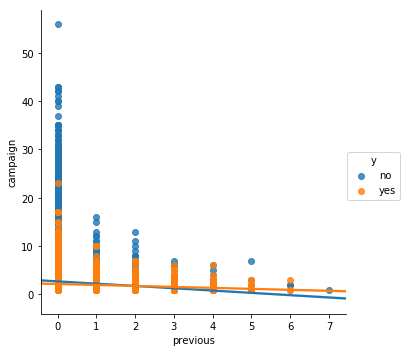

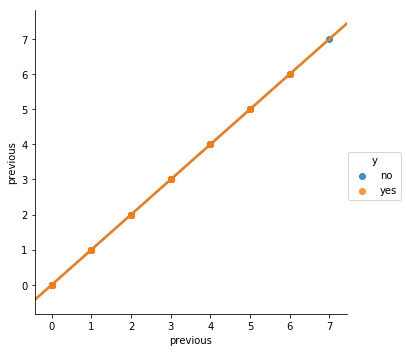

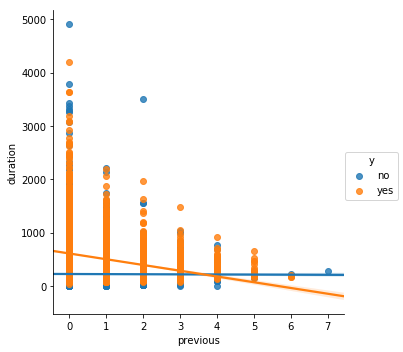

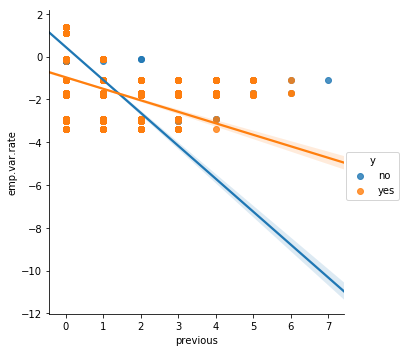

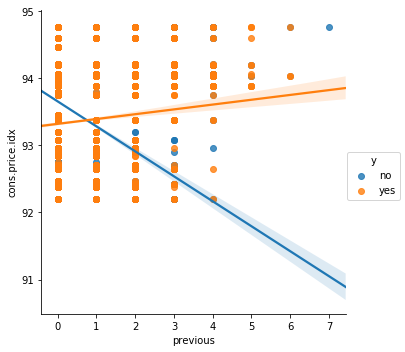

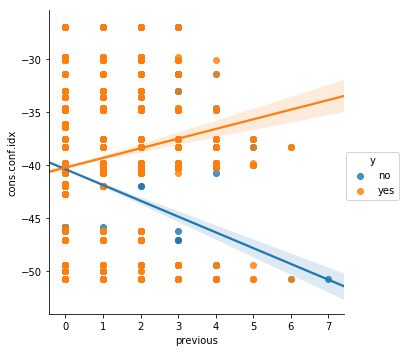

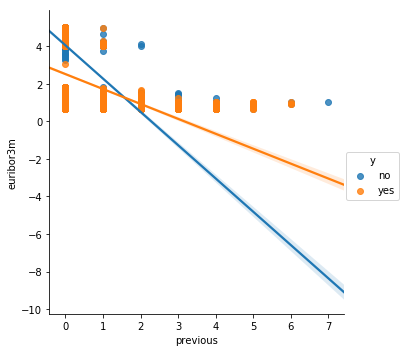

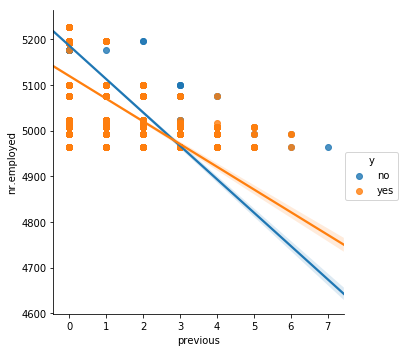

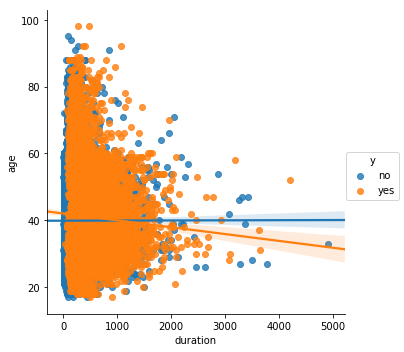

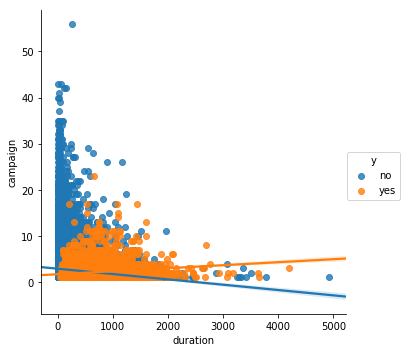

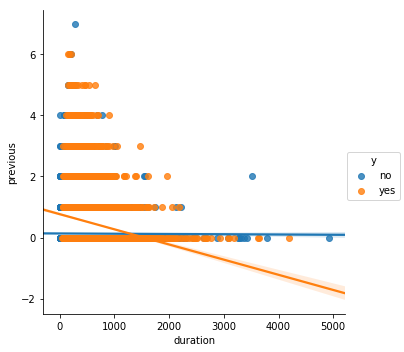

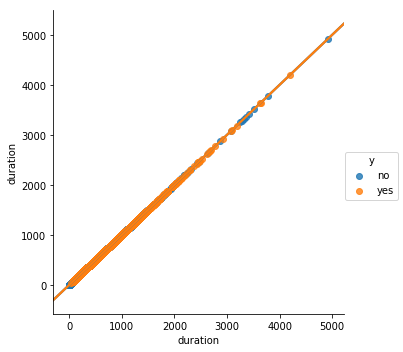

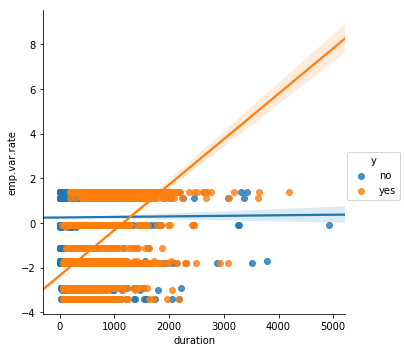

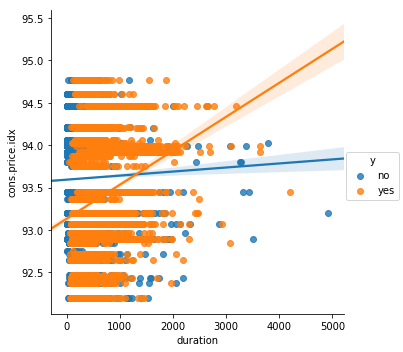

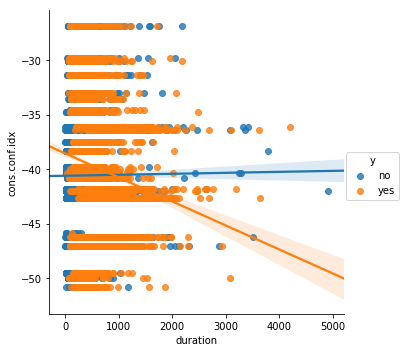

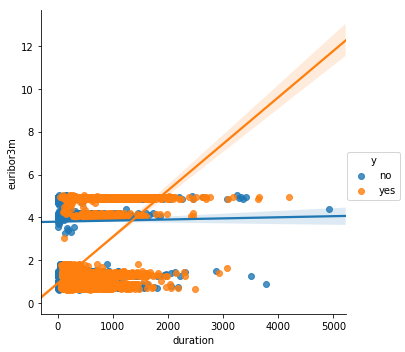

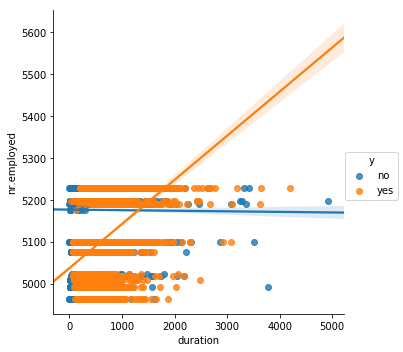

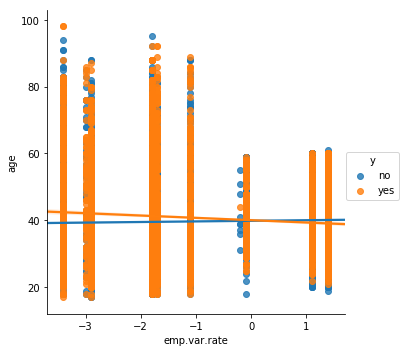

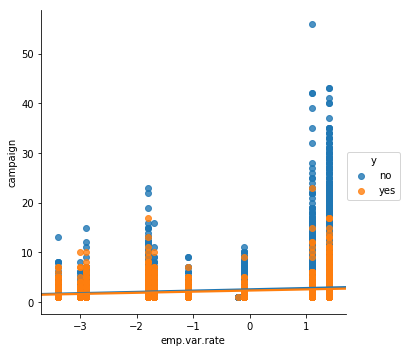

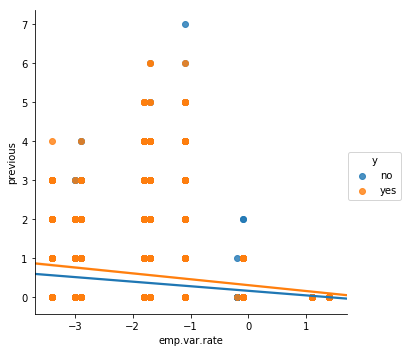

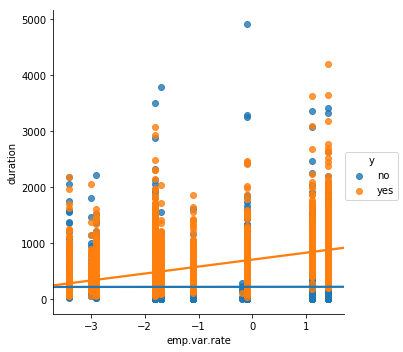

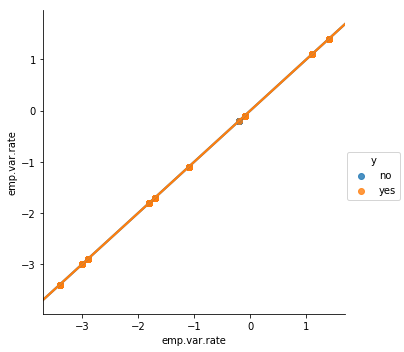

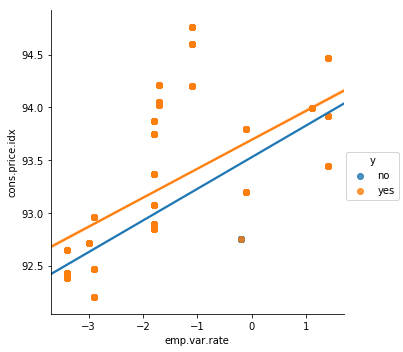

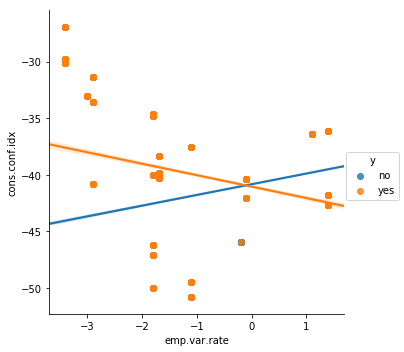

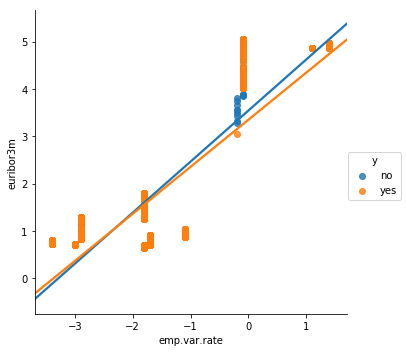

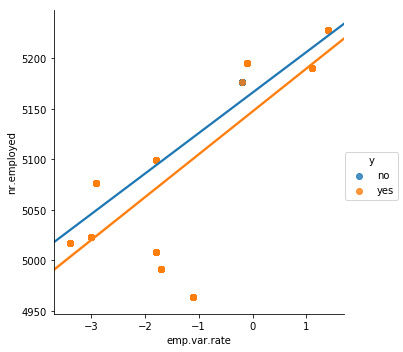

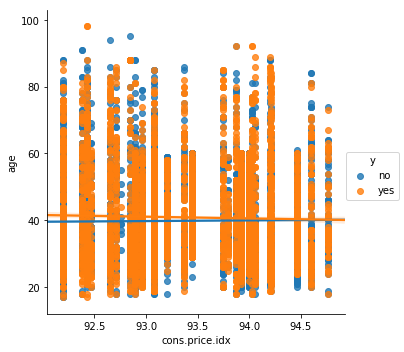

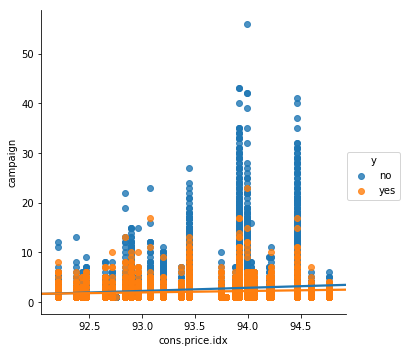

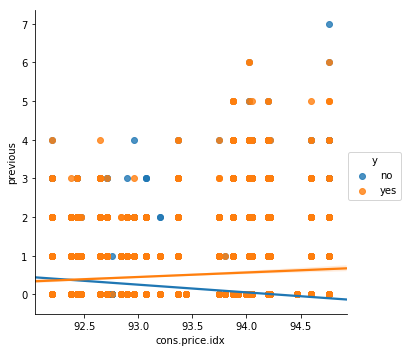

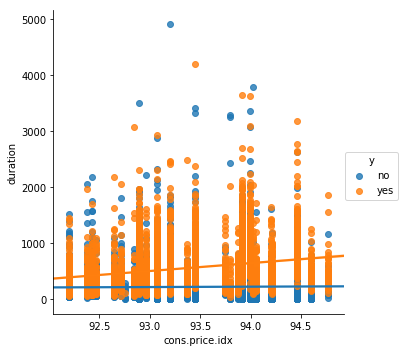

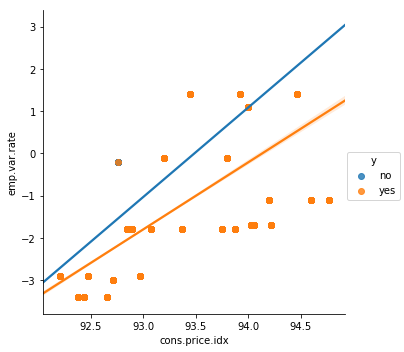

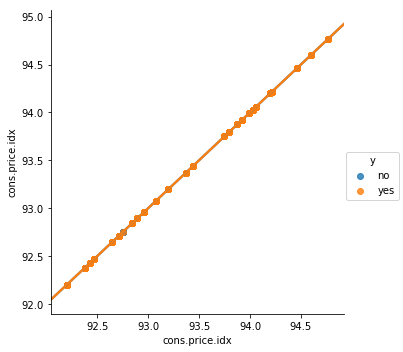

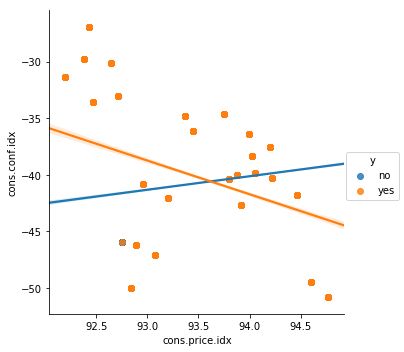

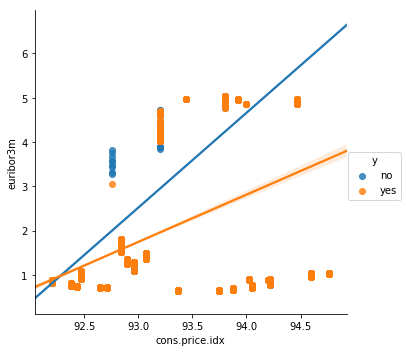

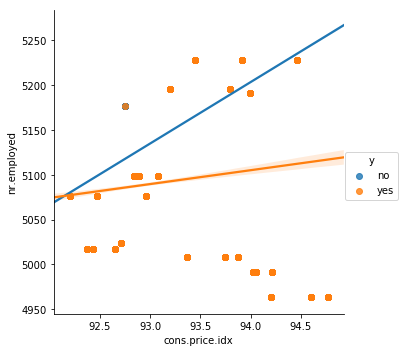

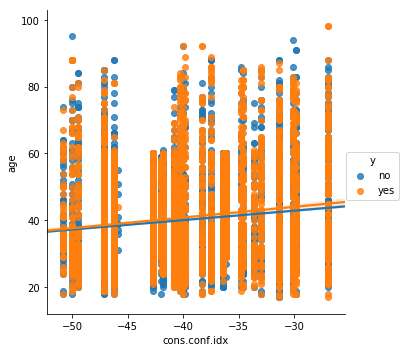

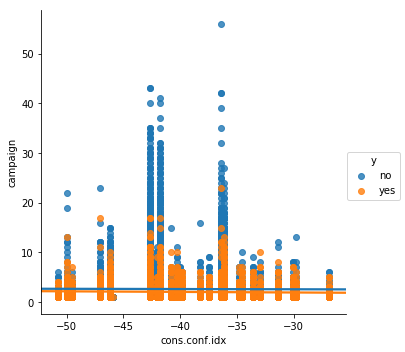

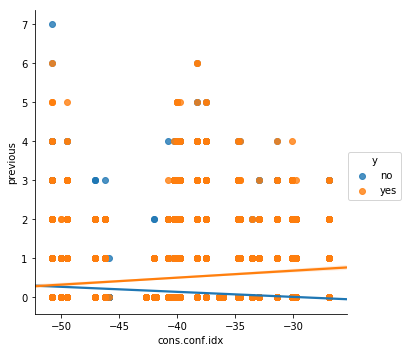

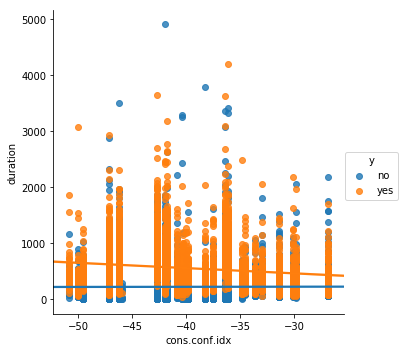

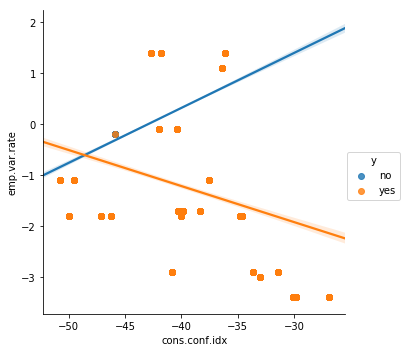

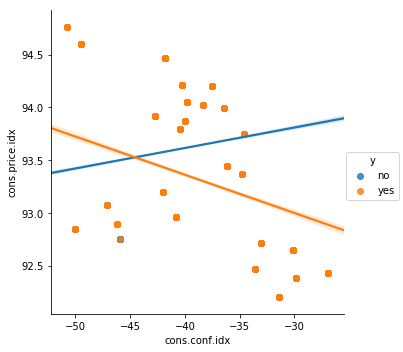

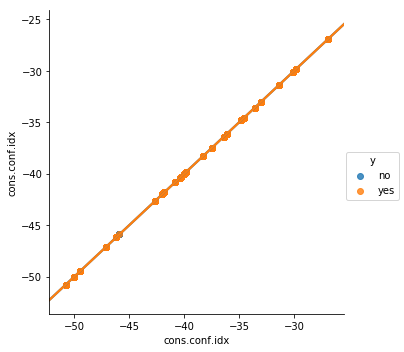

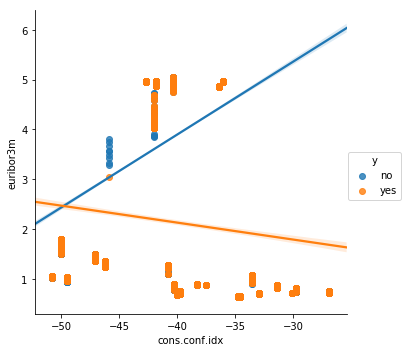

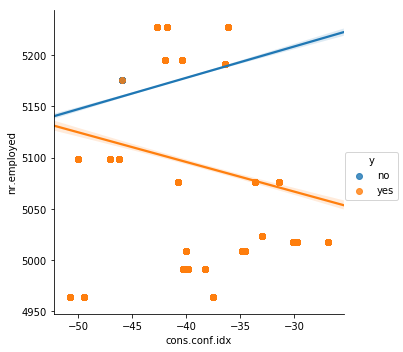

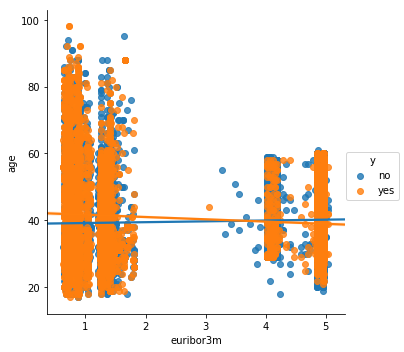

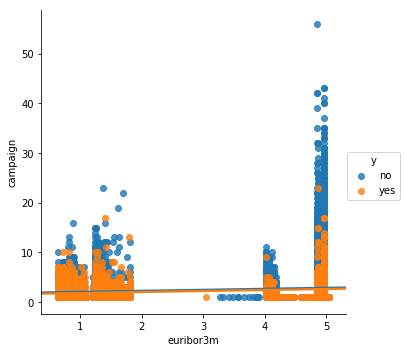

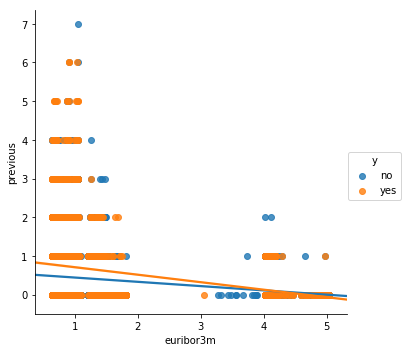

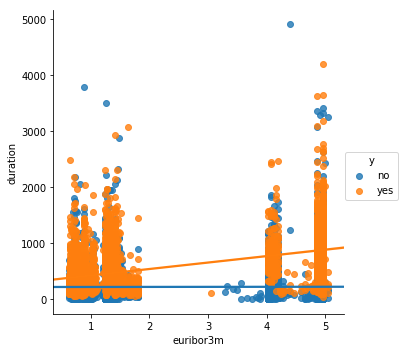

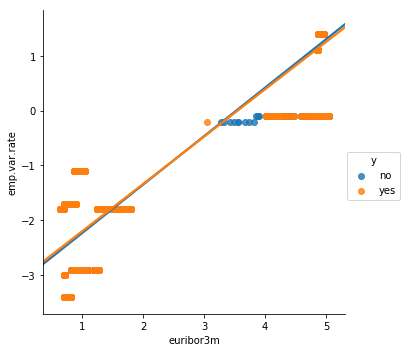

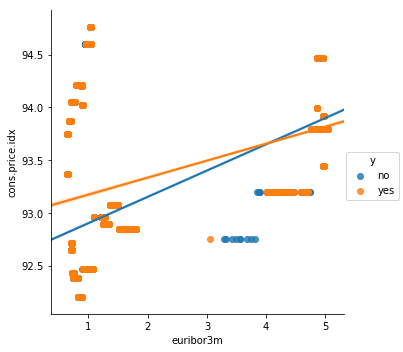

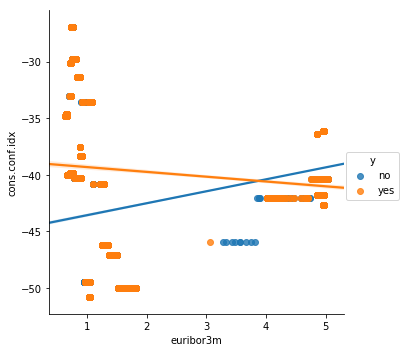

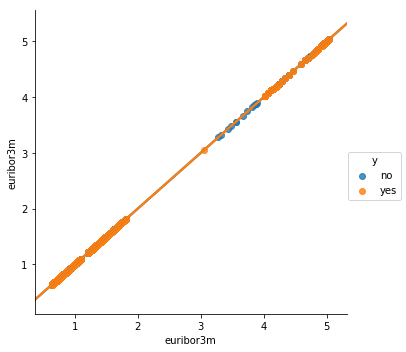

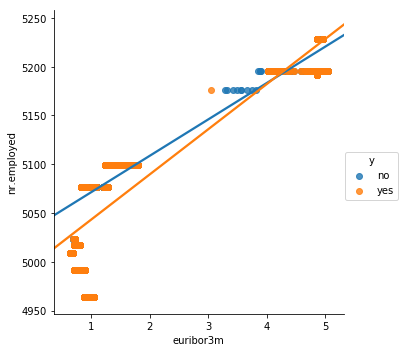

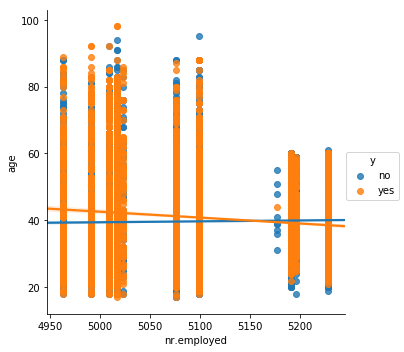

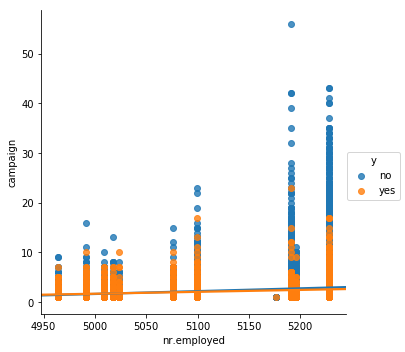

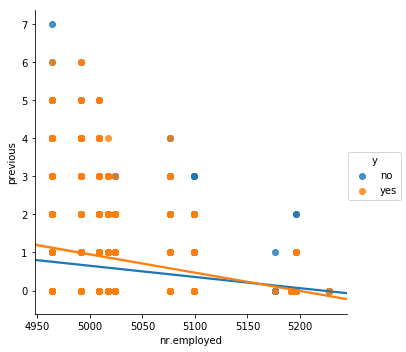

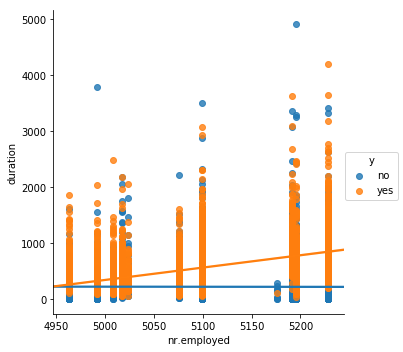

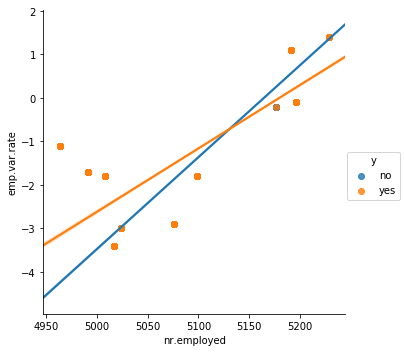

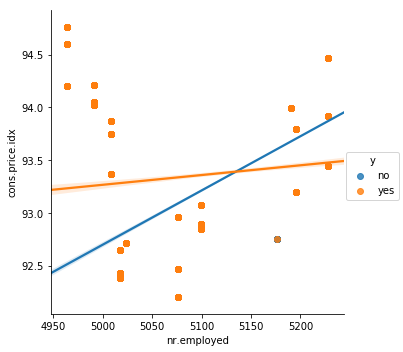

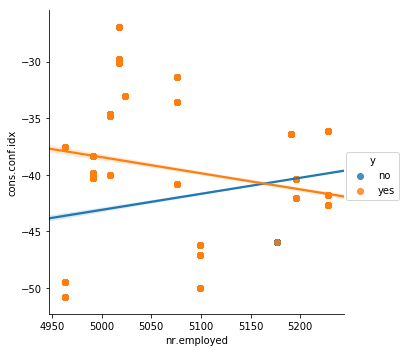

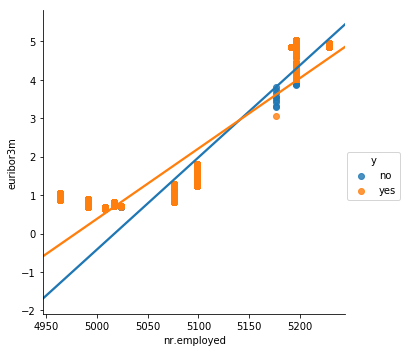

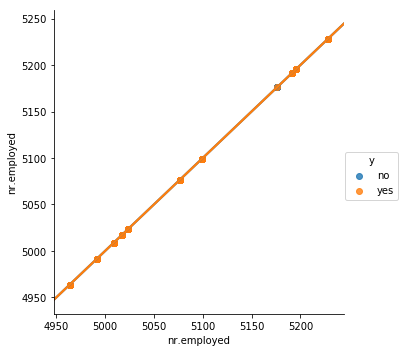

In [109]:
# the scatter plot of the numeric attributes and hue plot according to
# the target variables..

for i in numeric_vars:
    for j in numeric_vars:  
        sns.lmplot(x=i,y=j,hue=target,data=df1)
        plt.show()

In [110]:
# campaign, age, previous, duration, emp valrate are the attributes which 
# have a clear descison boundary

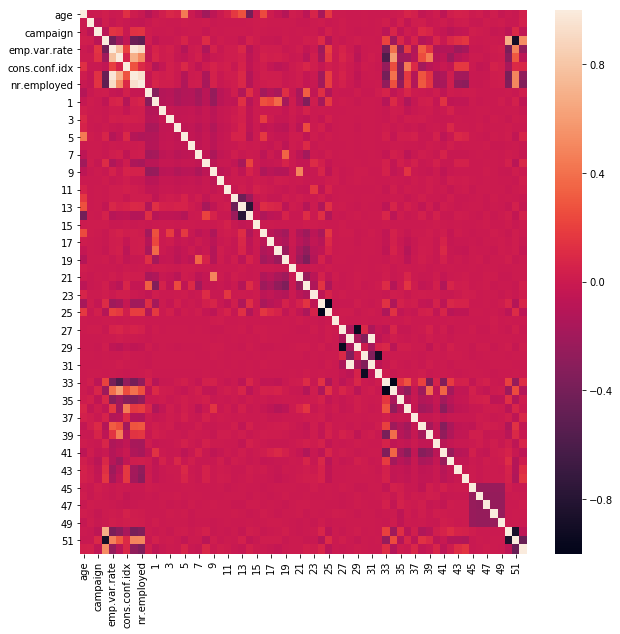

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

In [140]:
# the black spots and white spots shows the more correlated parts..
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df1["y"]=[1 if i=="yes" else 0 for i in df1["y"]]

In [146]:
X = df1[[i for i in df1.columns if i != "y"]]  #independent columns
y = df1["y"]    #target column i.e price range

/home/pratyush/yes/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[  7.66743557e-02   2.21979789e-01   5.60828481e-02   1.05821236e-02
   3.45098983e-02   1.59095044e-02   9.22282526e-03   7.47493232e-02
   2.94997995e-02   1.50377612e-02   1.01518717e-02   4.56251923e-03
   3.68477407e-03   8.00893237e-03   7.63562578e-03   5.37741141e-03
   6.96620202e-03   5.00087358e-03   1.25305825e-02   4.73699029e-03
   2.21995834e-03   9.11840560e-03   1.38859265e-02   1.21492600e-02
   6.65731313e-04   7.17940629e-03   5.86825614e-03   8.95043221e-03
   1.40959041e-02   2.37741788e-04   9.19222366e-03   1.41705403e-02
   6.45306740e-03   5.11243933e-03   7.90879846e-03   1.29999704e-06
   1.80402848e-02   2.48801683e-03   1.91353375e-02   1.21920976e-02
   2.51251658e-03   1.18450065e-02   5.55107894e-03   1.01368639e-02
   3.33251407e-03   2.68396255e-03   1.31255267e-03   3.93595394e-03
   3.76933137e-03   6.13540553e-03   1.09734258e-02   5.24581357e-03
   6.56831049e-03   4.02695186e-03   1.28459461e-02   1.44617188e-02
   1.38896549e-02   1.27029128e-02

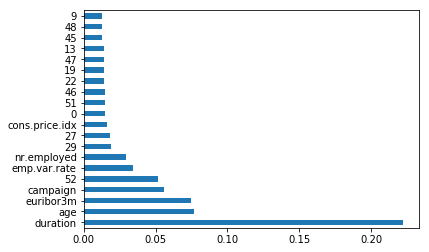

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [163]:
# we get that most of the numeric variables that we used were giving the best resulta
df_select=df1[feat_importances.nlargest(20).index.values]
df_select["y"]=df1["y"]
X=df_select[[i for i in df_select.columns if i != "y"]].values
y=df_select["y"].values

/home/pratyush/yes/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

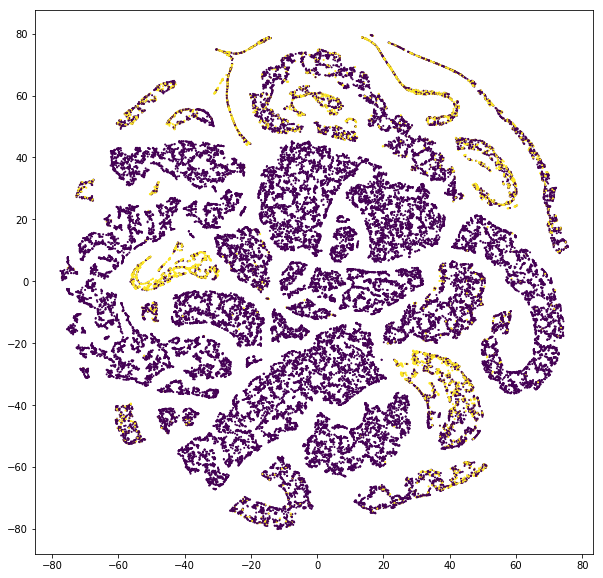

In [167]:
s = [1 for n in range(len(X_embedded[:,0]))]
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=df1[target].values,s=s)
plt.show()
#these tsne plots show a clear distinction between the yes and no clusters..

In [173]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=1, stratify=y)

In [190]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(accuracy_score(neigh.predict(X_test),y_test))

0.904831269726
0.907623209517
0.90786598689
0.90823015295
0.909201262442
0.910415149308
0.909201262442
0.909322651129
0.908594319009
0.908351541636
0.90750182083
0.906530711338
0.907744598203
0.906652100024
0.905195435785
0.905195435785
0.904831269726
0.905074047099
0.905074047099
0.904709881039
0.904102937606
0.90398154892
0.90361738286
0.9032532168
0.9032532168
0.901068220442
0.900339888322
0.899611556203
0.89936877883
0.899126001457
0.898397669337
0.898276280651
0.897547948531
0.897426559845
0.896698227725
0.895969895606
0.896455450352
0.896455450352
0.896212672979


In [191]:
# here we are getting maxm accuracy for the k = 60 here..
# But here we have a unbalanced dataset..

In [192]:
# we can do oversampling on the non tsne X to get a balanced result..
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [198]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [197]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [201]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

Validation Results
0.91211459092
0.578366445916
